## Korelacje

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
train_df = pd.read_csv("train.txt", sep = " ").sort_index()
test_df = pd.read_csv("testx.txt", sep = " ").sort_index()

In [3]:
df = train_df.corr()

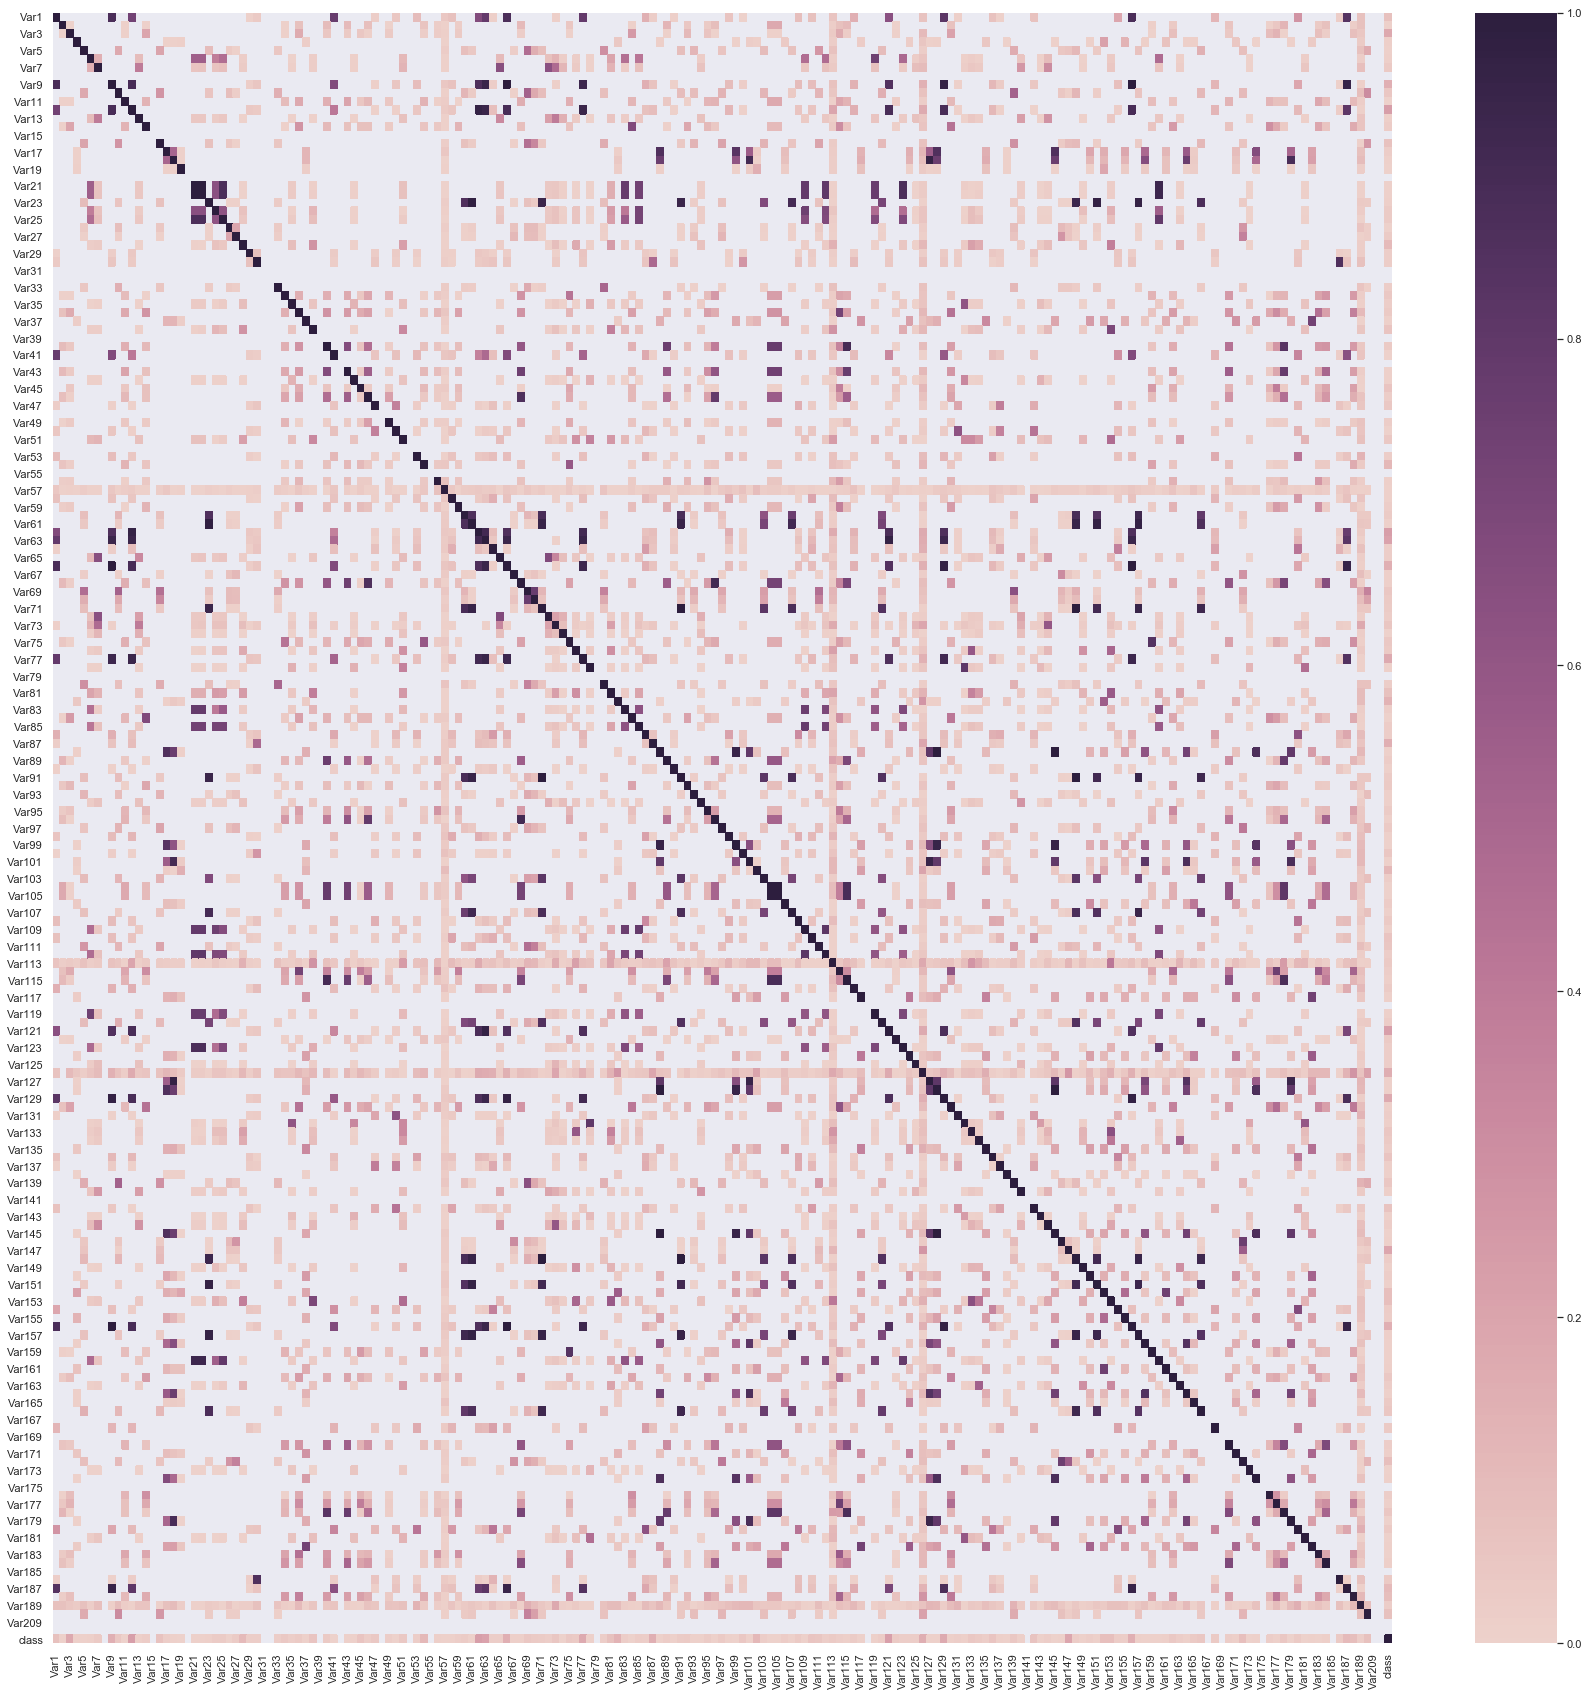

In [4]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(data=abs(df), cmap = sns.cubehelix_palette(as_cmap=True))
plt.savefig('corr_heatmap.png', bbox_inches='tight', dpi=100)

In [5]:
def inspect_variation_df(df):
    assert df.shape[0] == df.shape[1]
    threshold = 0.9
    n = df.shape[0]
    varList = []
    col_corr = []
    for i in range(n-1):
        for j in range(i+1, n):
            if df.iloc[i, j] >= threshold:
                varList.append((df.iloc[i, j], df.index[i], df.columns[j]))
                col_corr.append(df.index[i])
                col_corr.append(df.index[j])
    return np.array(varList), pd.Series(col_corr)

In [6]:
varList, col_corr = inspect_variation_df(df)

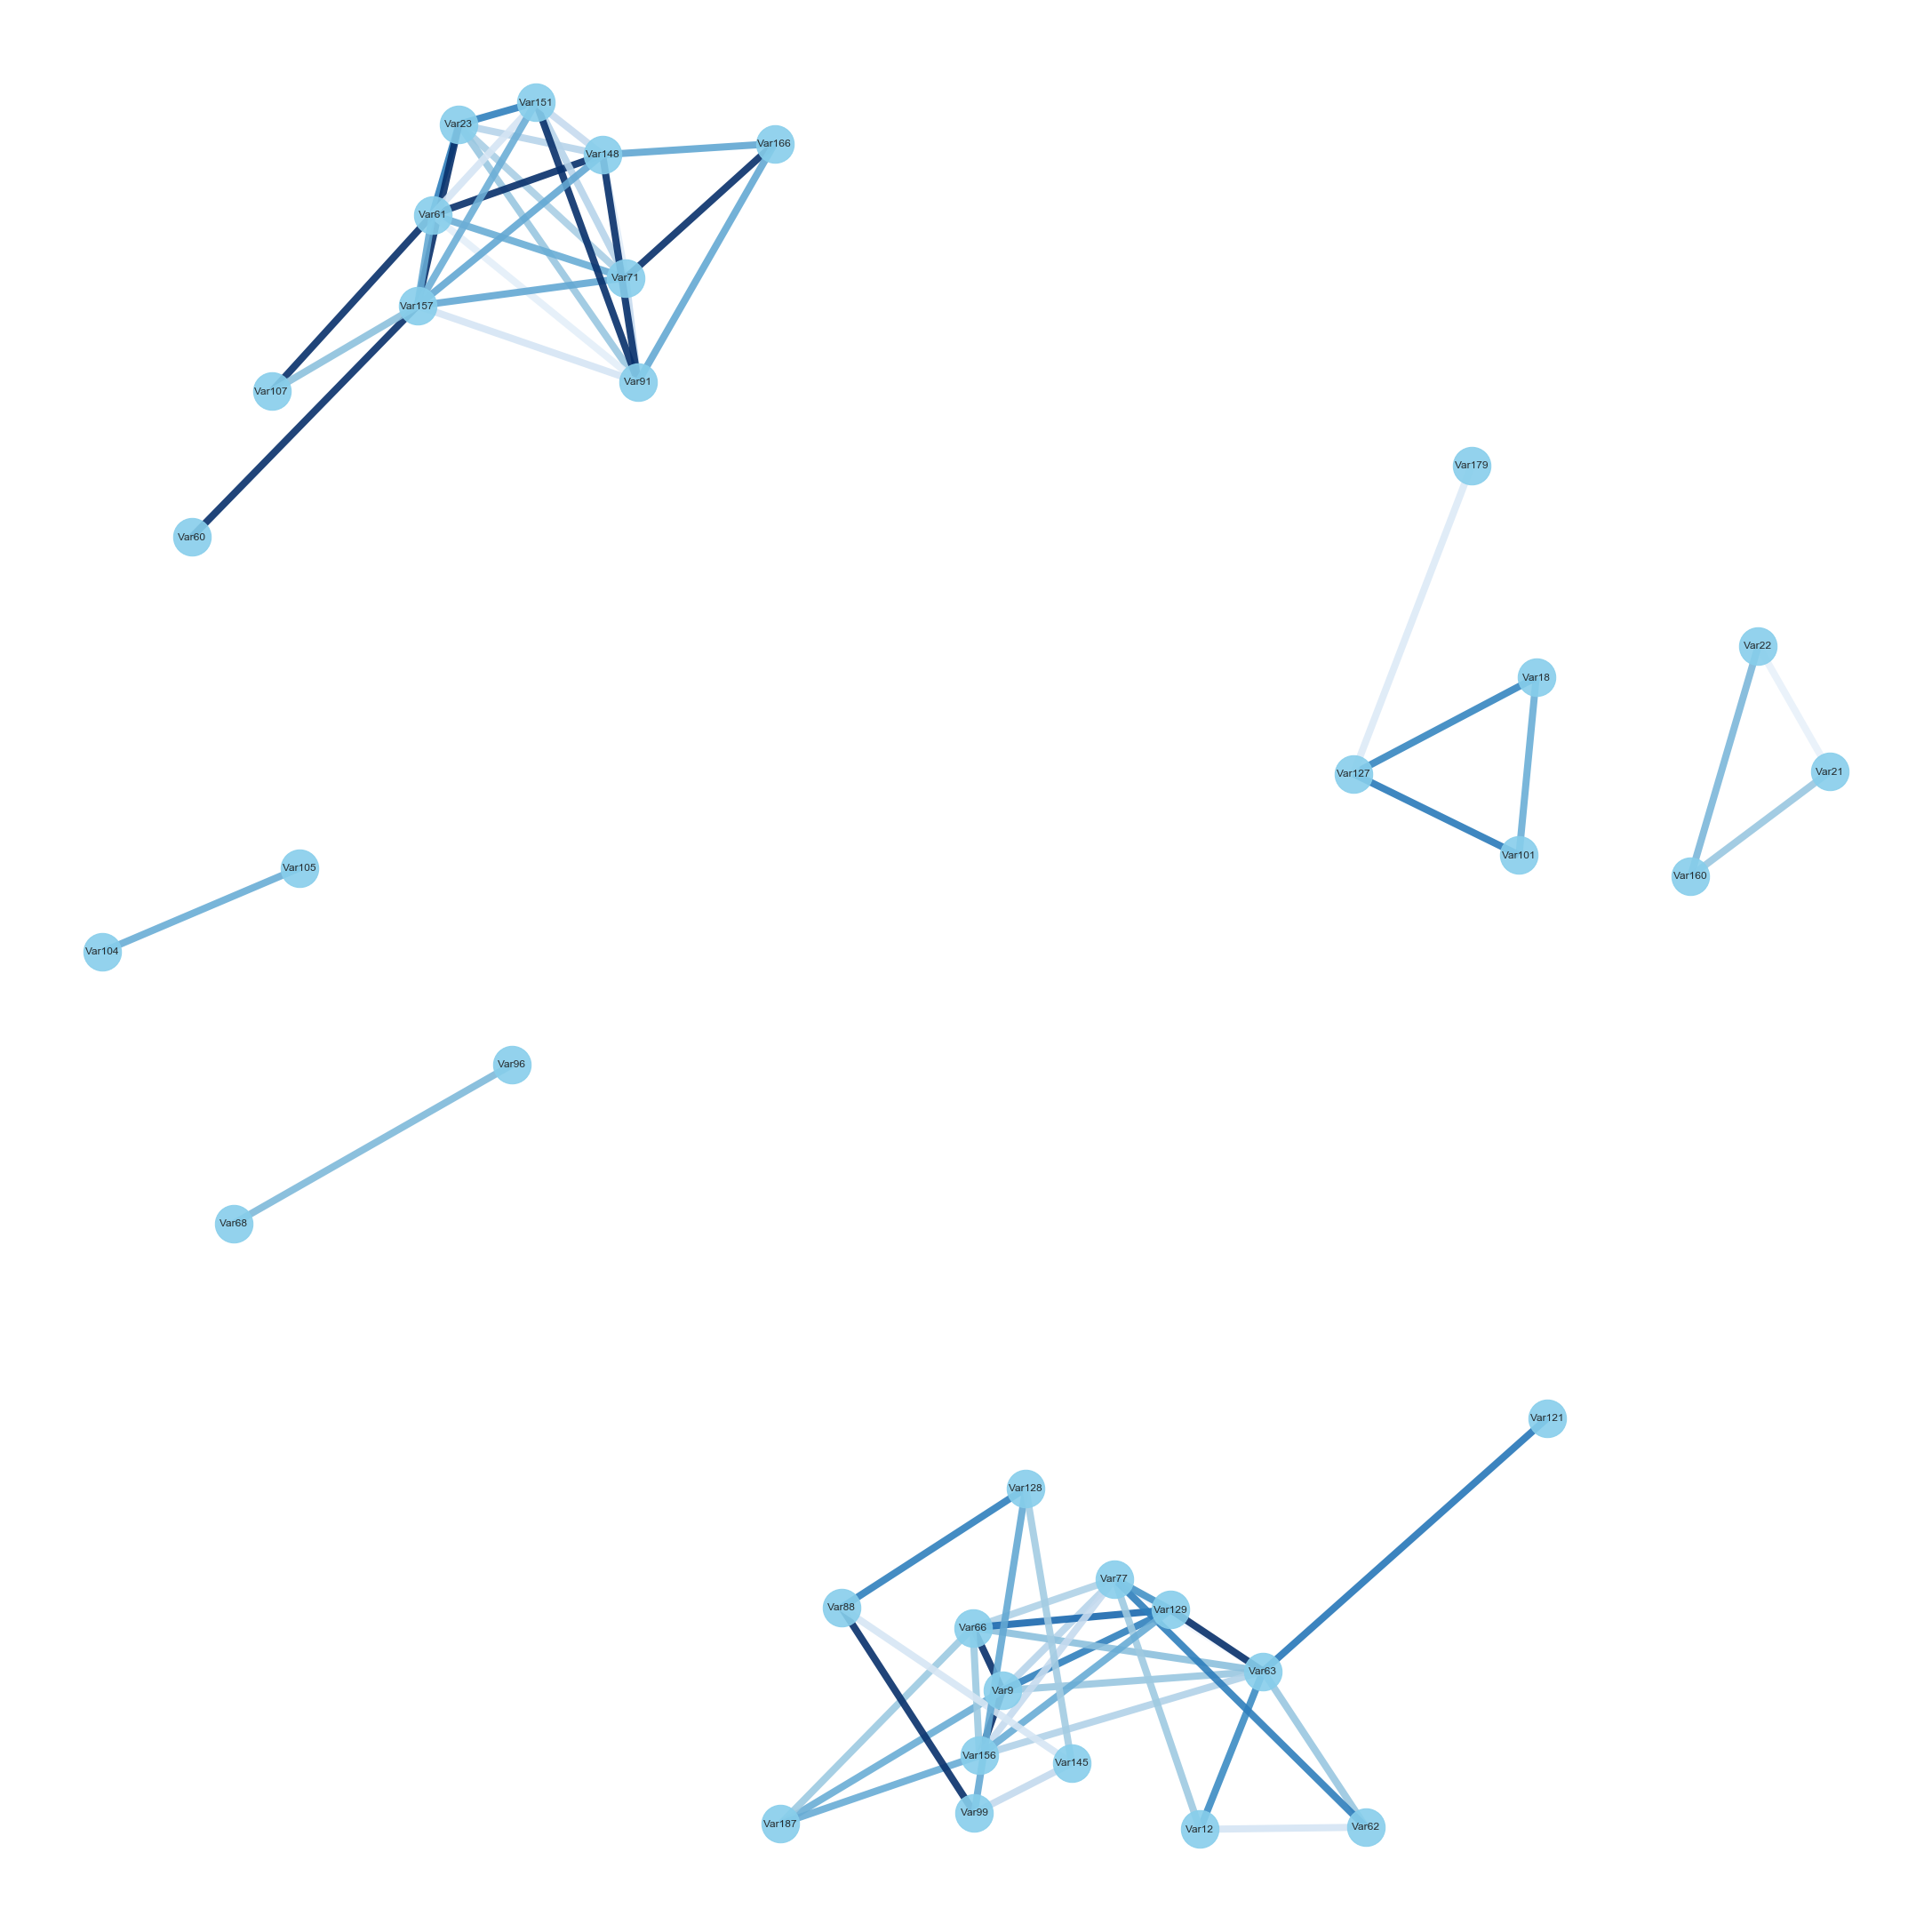

In [7]:
df2 = pd.DataFrame(varList)

G = nx.from_pandas_edgelist(df2, 1, 2, create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.5)

# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1800, width=8, alpha = 0.9, edge_color=df2[0].astype(np.float), 
        edge_cmap=plt.cm.Blues, pos=pos, edge_vmin=0.9, edge_vmax=1)
plt.savefig('nx.png', bbox_inches='tight', dpi=100)